# SF Bay Area Bike Share

### Exploratory data analysis

In [11]:
#loading the required libraries 
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [12]:
#loading bike trips data
trips = Table.read_table('trip.csv')
trips

id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
4563,111,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


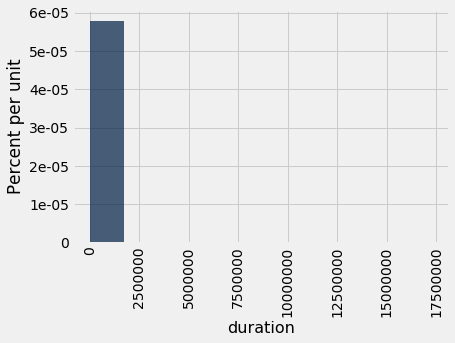

In [13]:
#lets plot a histogram on duration column 
trips.hist('duration')

that is one boring looking histogram - only one bar in the left and huge numbers in the right. 
Let's see whats going in here - first, lets sort this this table by duration 

In [14]:
trips.sort('duration', descending = 'TRUE')

id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531
825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024
841176,1133540,7/10/2015 10:35,University and Emerson,35,7/23/2015 13:27,University and Emerson,35,262,Customer,94306
111309,722236,11/30/2013 13:29,University and Emerson,35,12/8/2013 22:06,University and Emerson,35,247,Customer,94301
522337,720454,10/30/2014 8:29,Redwood City Caltrain Station,22,11/7/2014 15:36,Stanford in Redwood City,25,692,Customer,94010
323594,716480,6/13/2014 16:57,Harry Bridges Plaza (Ferry Building),50,6/21/2014 23:59,Civic Center BART (7th at Market),72,633,Subscriber,94131
361321,715339,7/13/2014 5:50,Arena Green / SAP Center,14,7/21/2014 12:32,Adobe on Almaden,5,251,Customer,nil
774999,688899,5/20/2015 15:27,Palo Alto Caltrain Station,34,5/28/2015 14:49,California Ave Caltrain Station,36,230,Customer,nil
635260,655939,2/8/2015 3:05,San Jose Civic Center,3,2/15/2015 17:17,SJSU 4th at San Carlos,12,132,Customer,89451


Aha! the reason our histogram looks so strange is because some of the trips are just way too long. For example, if we look at the trips with duration 17270400 sec and convert it into the days, 17270400/60/40/24 = 199.88, then we find the bike was checked out for 200 days, seems like this bike was stolen and somehow got recovered after 200 days.

We are not interested in the trips like that, what we are interested in - is the standard way that the bike was used - that you could subscribe and use the bike as you want as long as your trips doesn't last not more than half and hour.

So lets call those trips commutes -

In [16]:
commute = trips.where('duration', are.below(1800)) #trips under 30 minutes 
commute

id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
4563,111,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


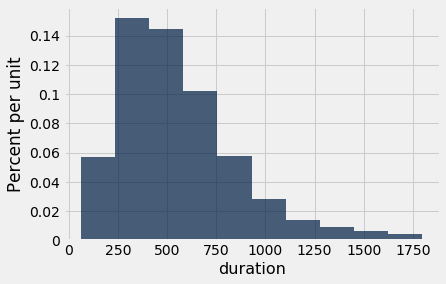

In [26]:
#lets draw a histogram 
commute.hist('duration')

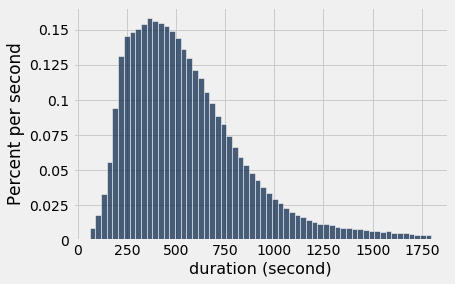

In [27]:
#lets set bins, 60, and lable our units (what duration is measured in  - that is seconds)
commute.hist('duration', bins=60, unit='second', edgecolor='w')

In [28]:
area = (550 - 250)*0.15 
area

45.0

Somewhat less than 50 % trips are in the range of 250sec - 550 sec, and the other half fall have the log tail to the right. and bunch of them are below 200 seconds. 

In [30]:
#lets look at where people were where they started 
starts = commute.group('start_station_name').sort('count', descending=True)
starts


start_station_name,count
San Francisco Caltrain (Townsend at 4th),48179
San Francisco Caltrain 2 (330 Townsend),33280
Harry Bridges Plaza (Ferry Building),29106
Temporary Transbay Terminal (Howard at Beale),25750
2nd at Townsend,25042
Embarcadero at Sansome,24838
Steuart at Market,23761
Townsend at 7th,23379
Market at Sansome,23167
Market at 10th,19435


group is useful to tell where does people start, what about where they go? 
To know that we need to see the start and end destination. The convenient way to see this through Pivot table


In [31]:
commute.pivot('start_station_name', 'end_station_name')

end_station_name,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,Broadway at Main,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearney,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Jose Government Center,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearney,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,122,409,867,237,0,0,93,31,0,0,0,143,185,130,0,43,183,79,97,45,0,0,25,188,613,85,0,0,270,331,823,64,0,0,0,0,0,0,81,87,478,242,0,0,0,0,0,0,0,0,0,1309,666,40,0,0,0,0,0,0,0,0,0,109,275,0,0,103,356,444,0,10,39,106
2nd at South Park,692,340,184,323,0,0,453,109,0,0,0,230,171,260,0,98,118,345,143,299,0,0,109,181,914,1001,0,0,339,569,3419,236,0,0,0,0,0,0,137,395,173,324,0,0,0,0,0,0,0,0,0,1120,612,105,0,0,0,0,0,0,0,0,0,293,447,0,0,699,955,284,0,23,79,406
2nd at Townsend,812,270,468,173,0,0,1162,468,0,0,0,125,597,286,0,629,702,1184,1067,513,0,0,71,557,4297,697,0,0,190,444,1424,337,0,0,0,0,0,0,87,176,179,233,0,0,0,0,0,0,0,0,0,1659,524,43,0,0,0,0,0,0,0,0,0,152,1149,0,0,3888,1968,876,0,12,74,306
5th at Howard,318,418,256,162,0,0,120,144,0,0,0,338,138,282,0,66,102,148,255,94,0,0,225,142,577,808,0,0,489,259,415,207,0,0,0,0,0,0,58,130,312,259,0,0,0,0,0,0,0,0,0,1260,2996,101,0,0,0,0,0,0,0,0,0,306,353,0,0,268,1364,433,0,18,54,491
Adobe on Almaden,0,0,0,0,33,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,24,0,0,0,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,8,40,31,0,0,0,0,0,64,46,616,1,0,28,12,7,29,0,0,26,0,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,27,121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,16,0,0,0,0,0,0,0,0,0,43,0,0,0,0,0,0,0,0,30,17,17,0,0,0,0,0,21,45,33,1,0,105,30,65,546,0,0,90,0,0,0,0,0,0,0,0
Beale at Market,225,219,490,129,0,0,117,958,0,0,0,299,161,365,0,471,280,124,1063,451,0,0,125,781,131,136,0,0,393,476,300,44,0,0,0,0,0,0,35,84,384,330,0,0,0,0,0,0,0,0,0,1163,467,68,0,0,0,0,0,0,0,0,0,339,288,0,0,32,328,179,0,58,196,134
Broadway St at Battery St,99,96,365,125,0,0,1242,146,0,0,0,82,329,233,0,226,241,131,291,48,0,0,10,97,237,62,0,0,41,144,496,285,0,0,0,0,0,0,3,208,90,330,0,0,0,0,0,0,0,0,0,978,503,14,0,0,0,0,0,0,0,0,0,24,195,0,0,443,958,80,0,2,96,53
Broadway at Main,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,10,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
California Ave Caltrain Station,0,0,0,0,0,0,0,0,0,89,1,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,394,92,0,0,0,0,0,0,0,0,18,0,0,0,45,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,147,0,0,0


this looks like a nice way to see the start and end destination. But, wait a minute, why do we see so many zeros? Well, Adobe On Almaden is in SanJose, while Boradway St. is in SFO - only a serious cyclist would think of cycling from San Jose to San Fransico. So that explains zeros in the table. 

I wonder how does it take from point A to point B. Let's find out -

In [34]:
duration = trips.select(3,6,1)
duration.show(3)

start_station_name,end_station_name,duration
South Van Ness at Market,South Van Ness at Market,63
San Jose City Hall,San Jose City Hall,70
Mountain View City Hall,Mountain View City Hall,71


In [37]:
shortest = duration.group([0,1], min)
shortest

start_station_name,end_station_name,duration min
2nd at Folsom,2nd at Folsom,61
2nd at Folsom,2nd at South Park,61
2nd at Folsom,2nd at Townsend,118
2nd at Folsom,5th at Howard,215
2nd at Folsom,Beale at Market,219
2nd at Folsom,Broadway St at Battery St,351
2nd at Folsom,Civic Center BART (7th at Market),455
2nd at Folsom,Clay at Battery,272
2nd at Folsom,Commercial at Montgomery,275
2nd at Folsom,Davis at Jackson,311


In [40]:
#lets zoom in one place, Civic Center, and see the time taken form this station to other destination..
from_cc = shortest.where(0, are.containing('Civic Center')).sort(2)
from_cc

start_station_name,end_station_name,duration min
Civic Center BART (7th at Market),Civic Center BART (7th at Market),60
San Jose Civic Center,San Jose Civic Center,61
Santa Clara County Civic Center,Santa Clara County Civic Center,69
Civic Center BART (7th at Market),Powell Street BART,97
Civic Center BART (7th at Market),Market at 10th,104
San Jose Civic Center,San Salvador at 1st,105
San Jose Civic Center,Paseo de San Antonio,121
Civic Center BART (7th at Market),Golden Gate at Polk,140
San Jose Civic Center,SJSU 4th at San Carlos,142
Civic Center BART (7th at Market),San Francisco City Hall,145


You kinda get the notion about how far these stations are away and how long does take take to bike there from the starting location, Civic Center Bart.

## Maps

In [45]:
stations = Table.read_table('station.csv')
stations

id,name,lat,long,dock_count,city,installation_date
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


In [46]:
Marker.map_table(stations.select('lat','long','name'))

In [54]:
#it is kinda hard to look at the stations - lets try circle instead of markers 
sf = stations.where('city', 'San Francisco')
Circle.map_table(sf.select('lat', 'long', 'name'), color='green', radius=150)

In [55]:
from_cc

start_station_name,end_station_name,duration min
Civic Center BART (7th at Market),Civic Center BART (7th at Market),60
San Jose Civic Center,San Jose Civic Center,61
Santa Clara County Civic Center,Santa Clara County Civic Center,69
Civic Center BART (7th at Market),Powell Street BART,97
Civic Center BART (7th at Market),Market at 10th,104
San Jose Civic Center,San Salvador at 1st,105
San Jose Civic Center,Paseo de San Antonio,121
Civic Center BART (7th at Market),Golden Gate at Polk,140
San Jose Civic Center,SJSU 4th at San Carlos,142
Civic Center BART (7th at Market),San Francisco City Hall,145


In [56]:
colors = stations.group('city').with_column(
    'color', make_array('blue', 'red', 'green', 'orange', 'purple'))
colors

city,count,color
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple


In [59]:
# joining stations with colors
colored = stations.join('city', colors).select('lat', 'long', 'name', 'color')
colored

lat,long,name,color
37.3892,-122.082,Mountain View City Hall,blue
37.3944,-122.077,Mountain View Caltrain Station,blue
37.4069,-122.107,San Antonio Caltrain Station,blue
37.3903,-122.067,Evelyn Park and Ride,blue
37.4004,-122.108,San Antonio Shopping Center,blue
37.386,-122.084,Castro Street and El Camino Real,blue
37.4002,-122.099,Rengstorff Avenue / California Street,blue
37.444,-122.165,Palo Alto Caltrain Station,red
37.4445,-122.163,University and Emerson,red
37.4291,-122.143,California Ave Caltrain Station,red


In [60]:
#lets use color coding to draw map
Marker.map_table(colored)

In [62]:
station_starts = stations.join('name', starts, 'start_station_name')
station_starts

name,id,lat,long,dock_count,city,installation_date,count
2nd at Folsom,62,37.7853,-122.396,19,San Francisco,8/22/2013,15611
2nd at South Park,64,37.7823,-122.393,15,San Francisco,8/22/2013,18046
2nd at Townsend,61,37.7805,-122.39,27,San Francisco,8/22/2013,25042
5th at Howard,57,37.7818,-122.405,15,San Francisco,8/21/2013,12894
Adobe on Almaden,5,37.3314,-121.893,19,San Jose,8/5/2013,1173
Arena Green / SAP Center,14,37.3327,-121.9,19,San Jose,8/5/2013,1361
Beale at Market,56,37.7923,-122.397,19,San Francisco,8/20/2013,15175
Broadway St at Battery St,82,37.7985,-122.401,15,San Francisco,1/22/2014,9957
California Ave Caltrain Station,36,37.4291,-122.143,15,Palo Alto,8/14/2013,780
Castro Street and El Camino Real,32,37.386,-122.084,11,Mountain View,12/31/2013,1864


In [63]:
Circle.map_table(station_starts.select('lat', 'long', 'name').with_columns(
    'color', 'blue',
    'area', station_starts.column('count') * 1000
))

Looking at this map I can easily conclude that people borrow bike in SFO and not much in the other cities